<a href="https://colab.research.google.com/github/shahalpj/AIRBNB/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#first we need to mount the data from the drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#let's import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/Copy of Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(file_path)

In [ ]:

airbnb_df.shape

(48895, 16)

In [ ]:
#have a look on the columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:

airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#lets remove the null values from the data
airbnb_non_null_df = airbnb_df.dropna()

In [ ]:
airbnb_non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_non_null_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# ***Lets explore the hosts and areas***

In [ ]:
#lets groupby the hosts and areas

host_and_areas = airbnb_non_null_df.groupby(['host_name','neighbourhood_group','neighbourhood'])['calculated_host_listings_count'].count().reset_index()

In [ ]:
#lets take the top 5 listing from the data

top_five_host = host_and_areas.sort_values(by='calculated_host_listings_count',ascending= False).head()

In [ ]:
top_five_host

,host_name,neighbourhood_group,neighbourhood,calculated_host_listings_count
21076,Sonder (NYC),Manhattan,Financial District,170
11029,John,Manhattan,Hell's Kitchen,50
22992,Vida,Brooklyn,Greenpoint,49
21241,Stanley,Manhattan,Murray Hill,40
15762,Melissa,Brooklyn,Bedford-Stuyvesant,39


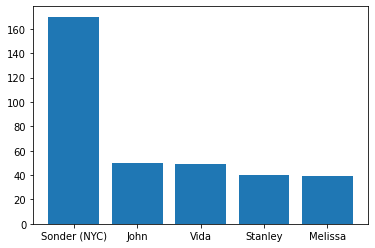

In [ ]:
plt.bar(top_five_host['host_name'],top_five_host['calculated_host_listings_count'])
plt.show()

##  Sonder(NYC) is the host having most no.of listing. John and Vida are in the second and third place for most no.of listing hosts.


In [ ]:
neighbourhood_group_count = airbnb_non_null_df['neighbourhood_group'].value_counts()

In [ ]:
neighbourhood_group_count


Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

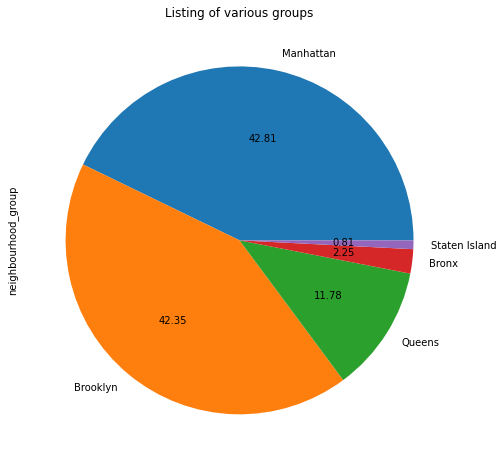

In [ ]:
neighbourhood_group_count.plot(kind='pie',autopct="%.2f",figsize=(16,8))
plt.title('Listing of various groups')
plt.show()


##**The group Manhattan have the most no.of listing(42.81%)**
##**Group Brooklyn is second in the listing (42.35%)**
##**Staten island have the least no.of listing(0.81%)** 





---



# ***Lets explore the reviews among the various locations*** 


In [ ]:
#lets groupby the data

reviews = airbnb_non_null_df.groupby(['name','neighbourhood_group','price'])['number_of_reviews'].sum().reset_index()

In [ ]:
reviews.sort_values(by='number_of_reviews',ascending=False)

,name,neighbourhood_group,price,number_of_reviews
29680,Room near JFK Queen Bed,Queens,47,629
17024,Great Bedroom in Manhattan,Manhattan,49,607
4545,Beautiful Bedroom in Manhattan,Manhattan,49,597
26543,Private Bedroom in Manhattan,Manhattan,49,594
29409,Room Near JFK Twin Beds,Queens,47,576
...,...,...,...,...
15463,Entire rowhouse+garden+deck in Park Slope/Gowanus,Brooklyn,350,1
15457,Entire one-bedroom apartment in heart of Harlem!,Manhattan,125,1
25497,Park Avenue 2 Bedroom,Manhattan,150,1
25498,Park Avenue 3 Bedroom 1.5 Bath,Manhattan,185,1


## **Room near JFK Queen Bed is the most reviewed hotel(629).Great Bedroom in Manhattan having the second highest reviewed hotel(607).**



---



## **Reviews amoung various Neighbourhood Groups**

In [58]:
reviews_various_groups = airbnb_non_null_df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()

In [59]:
reviews_various_groups

,neighbourhood_group,number_of_reviews
0,Bronx,28334
1,Brooklyn,486174
2,Manhattan,454126
3,Queens,156902
4,Staten Island,11541


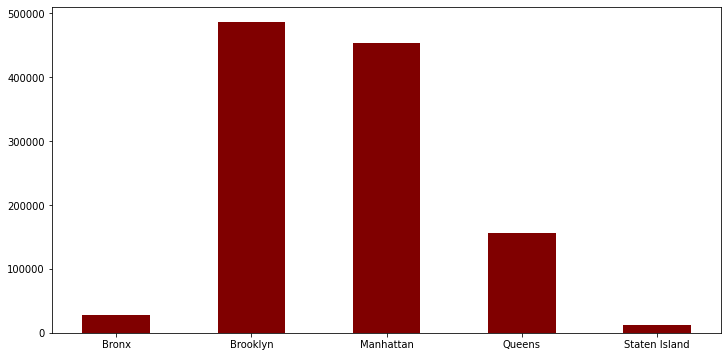

In [60]:
group = reviews_various_groups['neighbourhood_group']
rev = reviews_various_groups['number_of_reviews']

fig = plt.figure(figsize=(12,6))
plt.bar(group, rev, color='maroon',width=0.5)

plt.xlabel = ('neighbourhood_group')
plt.ylabel = ('number_of_reviews')
plt.title = ('Reviews among various groups')
plt.show()

## **Brooklyn and Manhattan having the most no.of reviews. And staten Island and Bronx having the least no of reviews.**



---



# **Lets explore the price of various hotel**

In [ ]:
price1 = reviews.sort_values(by='price',ascending=False)

In [ ]:
price1

,name,neighbourhood_group,price,number_of_reviews
21785,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5
16243,Furnished room in Astoria apartment,Queens,10000,2
32684,Spanish Harlem Apt,Manhattan,9999,1
28860,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,6
5606,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,8500,2
...,...,...,...,...
38471,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,0,55
5921,Best Coliving space ever! Shared room.,Brooklyn,0,5
32246,Spacious comfortable master bedroom with nice ...,Brooklyn,0,93
18560,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,0,1


## The **Luxury 1 bedroom apt. -stunning Manhattan views** and **Furnished room in Astoria apartment** are the most costed hotel (**10000**)

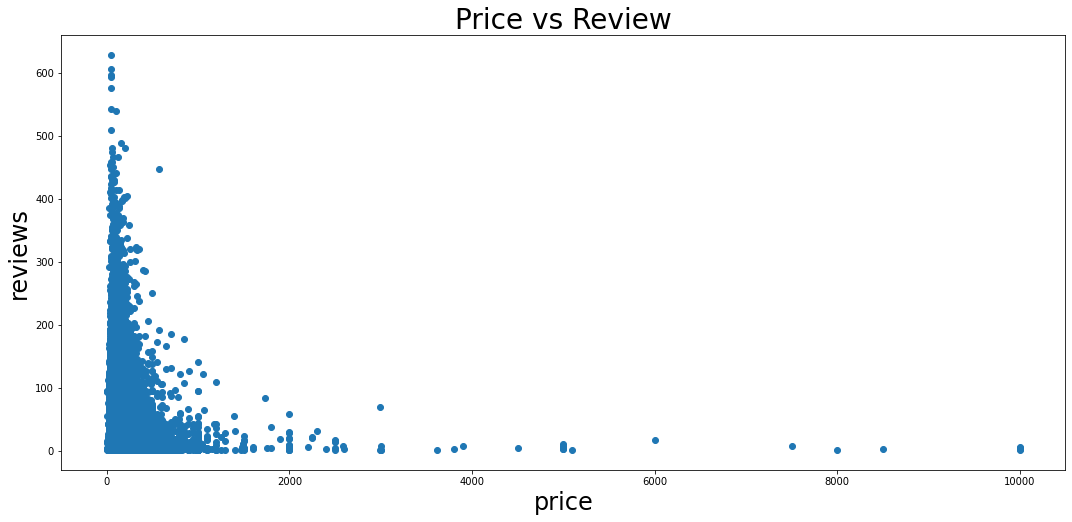

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(x = reviews['price'], y = reviews['number_of_reviews'])
plt.xlabel("price",fontsize=24)
plt.ylabel("reviews",fontsize=24)
plt.title('Price vs Review',fontsize=28)

plt.show()


## **In here we can see that most of the people prefers low costed hotels. Also most no.of reviews are came from the hotel having low cost.**



---



# **Busiest Hosts**

In [ ]:
#Lets findout the busiest host from the data

busiest_host = airbnb_non_null_df.groupby(['host_name','neighbourhood_group'])['minimum_nights'].count().reset_index()

In [ ]:
top_5_busiest_host = busiest_host.sort_values(by='minimum_nights',ascending=False).head()

In [ ]:
top_5_busiest_host

,host_name,neighbourhood_group,minimum_nights
11371,Sonder (NYC),Manhattan,207
8383,Michael,Manhattan,176
2772,David,Manhattan,149
5833,John,Manhattan,127
8382,Michael,Brooklyn,127


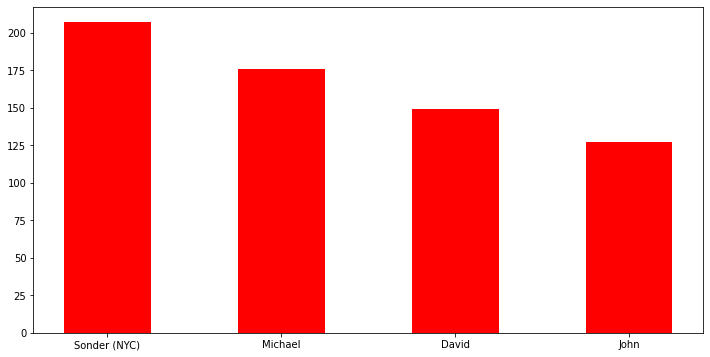

In [ ]:
name = top_5_busiest_host['host_name']
stayed = top_5_busiest_host['minimum_nights']

fig = plt.figure(figsize=(12,6))
plt.bar(name, stayed, color='red',width=0.5)

plt.xlabel = ('Host Name')
plt.ylabel = ('Minimum Nights')
plt.title = ('Top 5 Busiest Host')
plt.show()

# **Sonder (NYC) is the most busiest host (207).Michael(176) and David(149) is in 2nd and 3rd position.**







---



# ***Difference of traffic among different areas.***

In [56]:
#lets checkout various type of rooms in various neighbourhood group.

various_rooms = airbnb_non_null_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()

In [57]:
various_rooms.sort_values(by='minimum_nights',ascending=False)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,9962
3,Brooklyn,Entire home/apt,8159
4,Brooklyn,Private room,7990
7,Manhattan,Private room,6303
10,Queens,Private room,2678
9,Queens,Entire home/apt,1742
1,Bronx,Private room,524
8,Manhattan,Shared room,356
0,Bronx,Entire home/apt,308
5,Brooklyn,Shared room,290


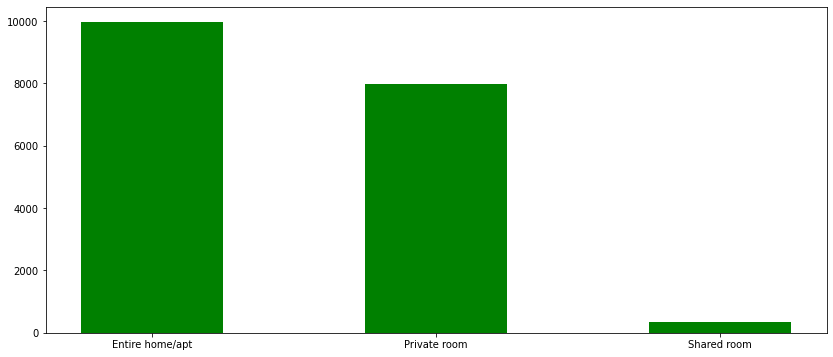

In [80]:
name = various_rooms['room_type']
stayed = various_rooms['minimum_nights']

fig = plt.figure(figsize=(14,6))
plt.bar(name, stayed, color='green',width=0.5)
plt.show()

## In here we can see that most no.of peoples stayed in **Entire home/apt** and **private room**. Least no.of people prefers **shared room**. So the places having **entire home/apt or private room** is the high traffic area.